In [1]:
%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc('image', cmap = 'gray')
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Defining a method to plot the clusters
ccolors = ['go', 'ro', 'bo', 'mo', 'co', 'yo']
def plotclusters(data, centers = None):
    xlim([0, 100]); ylim([0, 100])
    if centers is None:
        plot(data[:,0], data[:,1], 'bo', markersize = 5)
    else:
        for i in range(amax(centers)+1):
            plot(data[centers==i,0], data[centers==i,1], ccolors[i%len(ccolors)], markersize = 5)

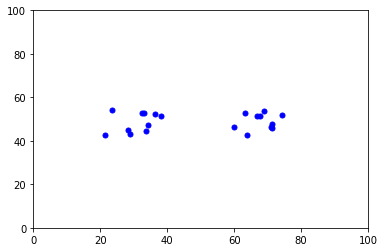

In [3]:
#A simple clustering problem
data = r_[4*randn(10, 2) + array([70, 50]),
         4*randn(10, 2) + array([30, 50])]
#shuffle data
plotclusters(data)

In [4]:
#Compute distance between each pair of the two collections of inputs
from scipy.spatial.distance import cdist
ds = cdist(data, data)

In [5]:
from scipy.cluster.hierarchy import *
lm = linkage(ds, 'single')
lm[:5]

<ipython-input-5-e1361a896370>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  lm = linkage(ds, 'single')


array([[ 5.        ,  8.        ,  1.03302099,  2.        ],
       [16.        , 18.        ,  2.65457774,  2.        ],
       [ 4.        , 20.        ,  3.26530092,  3.        ],
       [ 2.        ,  6.        ,  3.62595792,  2.        ],
       [10.        , 19.        ,  4.33850655,  2.        ]])

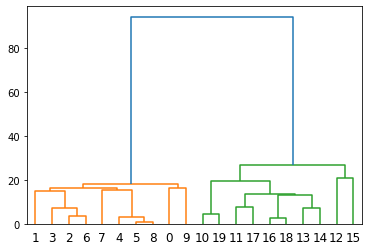

In [7]:
_ = dendrogram(lm)

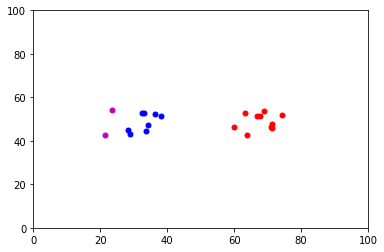

In [8]:
#Plotting the individual clusters
plotclusters(data, fcluster(lm, 3, criterion = 'maxclust'))

Now clusters are shown in 2 different colors. It means that algo has created 2 separate groupings based on some similarity criteria

### Linkage methods

In [9]:
data = r_[dot(randn(100, 2), diag([4, 10])) + array([60, 60]),
         dot(randn(100, 2), diag([4, 10])) + array([30, 50])]
shuffle(data)

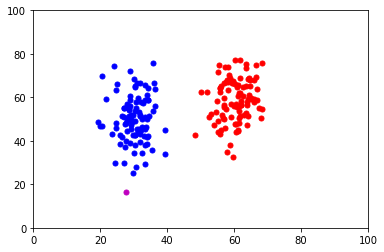

In [11]:
assignment = fclusterdata(data, 3 ,metric = 'euclidean', method = 'single', criterion = 'maxclust')
plotclusters(data, assignment)

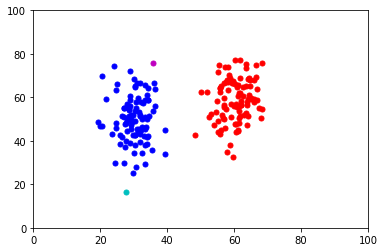

In [12]:
assignment = fclusterdata(data, 4 ,metric = 'euclidean', method = 'single', criterion = 'maxclust')
plotclusters(data, assignment)